In [1]:
import dlib
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
detector= dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("E:/eye_blink_detection/shape_predictor_68_face_landmarks.dat")

In [3]:
#............face_validator for mfr...................
def face_validator(image,faces):
  
    face = faces[0]
    shape = predictor(image, face)
    
    LEFT_EYE_INDICES = [36, 37, 38, 39, 40, 41]
    RIGHT_EYE_INDICES = [42, 43, 44, 45, 46, 47]
    #..............left eye.................
    points = map(lambda i: shape.part(i), LEFT_EYE_INDICES)
    points =list(points)
    xs = map(lambda p: p.x, points)
    ys = map(lambda p: p.y, points)
    left_eye =sum(xs) // 6, sum(ys) // 6
    #...................... right eye.................
    points = map(lambda i: shape.part(i),RIGHT_EYE_INDICES)
    points =list(points)
    xs = map(lambda p: p.x, points)
    ys = map(lambda p: p.y, points) 
    right_eye = sum(xs) // 6, sum(ys) // 6
    
    #...............angle measure................................
    x1, y1 = left_eye
    x2, y2 = right_eye
    tan = (y2 - y1) / (x2 - x1)
    angle=np.degrees(np.arctan(tan))
    #print(angle)
    #if angle==0.0:
    if angle>0.0 and angle<=3.50:
        return True
        #np.save("E:/build_multi_face_recognizer/face_validator/",image) 
    else:
        #print("angle image")
        return False  
     
    

In [4]:
#read image from folder
font = cv2.FONT_HERSHEY_PLAIN
video="E:/build_multi_face_recognizer/person_9/person_9.mp4"
save_img="E:/build_multi_face_recognizer/face_validator/"
capture = cv2.VideoCapture(video)
#print(capture)
frames_num = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
#print(frames_num)
images=[]
t=[]
for i in range(frames_num):
    capture.grab()
    if i % 50!= 0:
        continue
    success, frame = capture.retrieve()
    #print(frame) 
    if not success:
        continue
    id = os.path.splitext(os.path.basename(video))[0]
         
    #remove noise from frame_image
    #frame= cv2.fastNlMeansDenoisingColored(frame,None,10,10,7,21) 
    image_copy = np.copy(frame)
        
    #frame= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces=detector(frame)
    if len(faces)>0:
        #print(faces)
        frame_1=face_validator(frame,faces)
        #print(frame_1)
        t.append(frame_1)
        #if frame_1==True:
        #cv2.imwrite(os.path.join(save_img,"{}_{}.jpg".format(id, i)),frame_1)
        cv2.putText(frame,"validator: {}".format(frame_1),(70, 80), font,4, (255, 0, 0),3)
    
    images.append(frame)  
        

In [5]:
#print(images)

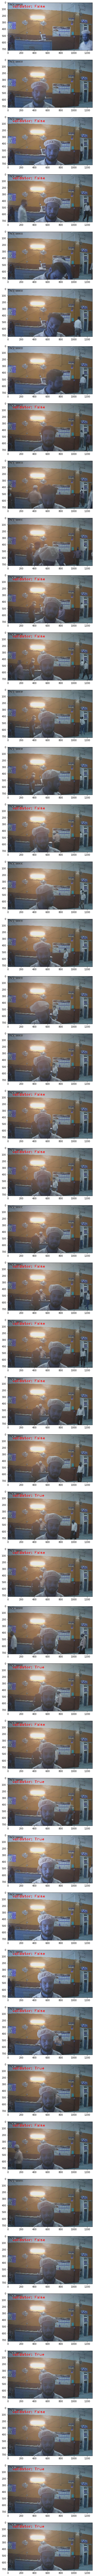

In [6]:
img=images
#print(len(img))
n=len(img)
f = plt.figure(figsize=(200, 200))
for i in range(n):
    f.add_subplot(n,1,i+1)
    plt.imshow(img[i])
    f.set_facecolor("white")
    #plt.title(t)
plt.show(block=True)